## Hyperparameter tuning in Python

**Course Structure:**
* Chapter 1. Hyperparameter and Parameters
* Chapter 2. Grid Search
* Chapter 3. Random Search
* Chapter 4. Informed Search

### CHAPTER 1. Hypeaparameter and Parameters

#### Part 1.1 Introduction & 'Parameters'

**Why do we need hyperparameter tuning?**
* New, complex algorithms with many hyperparameters
* Tuning can take a lot of time
* Develops deep understanding beyond the default settings
 
**Dataset used:**
* Relates to credit card defaults
* Variables related to the financial history of consumers in Taiwan
* 30,000 users and 24 attributes
* Target: whether they defaulted on their loan

**Parameters:**
* Components of the model learned during the modeling process
* You **DO NOT** set these manually
* The algorithm will discover these for you
* Ways to find parameters:
    1. Know a bit about the algorithm
    2. Consult the **Scikit Learn documentation**
    3. Check the **Attributes** section

*

In [11]:
# Code for part 1.1 

# extracting a Logistic Regression parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# get the dataset
credit_card = pd.read_csv('20_datasets/credit-card-full.csv')
# print(credit_card.info())

# column preprocessing
credit_card = credit_card.drop(['ID'], axis=1)
credit_card = pd.get_dummies(data=credit_card, columns=['SEX','EDUCATION', 'MARRIAGE'],drop_first=True)
print(credit_card.shape)

# split into training and testing dataframe
X = credit_card.drop(['default payment next month'], axis=1)
y = credit_card['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# create a LR model
log_reg_clf = LogisticRegression()

# fit the model
log_reg_clf.fit(X_train, y_train)

# create a list of original variable names 
original_variables = X_train.columns

# extract the coefficients of the LR model
model_coefficients = log_reg_clf.coef_[0]

# create a dataframe of the variables and coefficients 
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})

# print out top 3 positive variables
top_three_df = coefficient_df.sort_values(by=['Coefficient'], axis=0, ascending=False)[0:3]
print(top_three_df)

(30000, 31)
     Variable  Coefficient
9   BILL_AMT2     0.000006
12  BILL_AMT5     0.000006
2       PAY_0     0.000005


E:\PYTHON\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


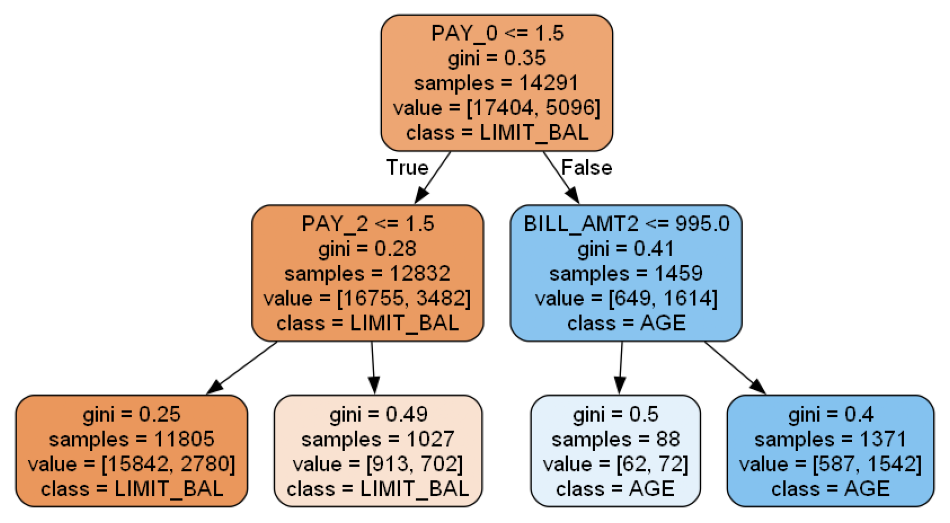

This node split on feature PAY_0 , at a value of 1.5


In [21]:
# Code for part 1.1 (continue)

# extracting a Random Forest parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
import os
import matplotlib.pyplot as plt

# create a RF model
rf_clf = RandomForestClassifier(max_depth=2, random_state=123)

# fit the model
rf_clf.fit(X_train, y_train)

# extract the 7th tree from the random forest (index 6)
chosen_tree = rf_clf.estimators_[6]

# visualize the graph 
export_graphviz(chosen_tree, out_file='20_rf_tree.dot',
                feature_names=X_train.columns,
                class_names=X_test.columns,
                rounded=True, proportion=False,
                precision=2, filled=True)

os.system('dot -Tpng 20_rf_tree.dot -o Images/20_tree.png')
# call(['dot', '-Tpng', 'tree.dot', '-o', 'Images/20_tree.png', '-Gdpi=600'])

plt.figure(figsize=(12,12))
plt.imshow(plt.imread('Images/20_tree.png'))
plt.axis('off')
plt.show()

# extract the parameters and level of the top node (index 0)
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]
print('This node split on feature {} , at a value of {}'.format(split_column_name, split_value))


#### Part 1.2 Introducing hyperparameters

* 